# ASG5:
This notebook contains the submission materials for Ian Feekes' submission of Module 5 USD MSAAI Machine Learning fundamentals class. 

If the material in this submission does not meet requirements, please email me at ifeekes@sandiego.edu and I will gratefully and expediently remedy the situation. 

The material for this code should live in the repository here: https://github.com/USD-AAI/aai-510-01-su22-new-ianfeekes-sandiego/tree/main/Module_5

Thank you for taking the time to teach me and to evaluate my work!

## Prompt:
Consider the scenario where a new credit union wants to predict loan-default. As they are new, they have not observed any defaults. Bayesian methods come in handy to have a stand-in model before more data is available.
Use Bayesian techniques on the credit-default data to improve the results of the model built in Module 4. Hint: look at other data files in the data set for any a priori information.

Compare the performance with and without the Bayesian model. 
    The Bayseian model is built and used with GBT to improve performance

Write a paragraph on why you observe these results. 
    Performance comparison both with and without the bayesian model
    Explains why the results were observed in a paragraph

## Analysis:
The performance of the GBT baseline is highlighted in my submission for Module 4. I was unable to get the Bayesian model working on time, even though I spent well over 20 hours on this assignment. If the model were to work with Naive Bayesian techniques to improve the results, my predictions would be as follows:

The Naive Bayesian gradient boosted tree would have significantly higher performance than the baseline on a max depth of at least 5-10 (up to 20-30% accuracy). Naive Bayes provides a high performance and scalability model for building and scoring. This model can quickly learn from using multidimensional features such as this dataset, even if training data is sparse (which it is not in this case). Naive Bayes classification is a most favored, if not optimal method of supervised learning if the entries are independent between classes, and is ideal for use with Boosted classifiers. This is because the general idea of boosting involves learning a series of classifiers, where each classifier in the series gains more weight towards previous misclassifications. It is similar to a feed-forward in perceptrons. 

#### References:
http://deebuls.github.io/Naive-Bayes-Pandas.html

https://www.baeldung.com/cs/naive-bayes-classification-performance

https://towardsdatascience.com/markov-chain-monte-carlo-in-python-44f7e609be98

https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/

https://towardsdatascience.com/naive-bayes-classifier-how-to-successfully-use-it-in-python-ecf76a995069

https://burakozen.medium.com/gradient-boosted-trees-89e7e3b178cc

https://www.educative.io/answers/calculating-mean-squared-error-in-python

https://machinelearningmastery.com/tpot-for-automated-machine-learning-in-python/

Elkan, Charles. (1997). Boosting And Naive Bayesian Learning. 

### Global Variables
The following cell contains files used for directory organization, global flags, and other useful files

In [22]:
# Global Variables
debug = True                        # Displays additional logging output
savePlots = False                   # Saves plot image files
showCorrelation = False             # Saves information on correlation variablespca = PCA(10)
targetColumnName = "TARGET"         # Name for column denoting dependant variable
outlierThreshold = 3                # Number of standard deviations from which data will be classified as an outlier
dropMissingValues = True            #Needs to be true for randomTreeRegressor
plotAllVariables = False            # Plot boxplots and bar plots for the entire dataset - time consuming

# Used for debugging display
lineString = "---------------------------------------------------------------------------------------------------------"

if debug == True:
    print("Global variables cell completed...")

Global variables cell completed...


### Library Inports
The following cell contains various library imports used largely for data frames, data analysis, and plotting. 

In [23]:
# Library Imports
from nis import cat
from re import X
import pandas as pd                 # Used for data frame
import plotly                       # Saves html plots
import plotly.express as px         # Used for displaying plots
import os                           # Allows file manipulation and console debugging for offline jupyter
import numpy as np
from scipy import stats             # Used for outliers
import matplotlib.pyplot as plt     # Used for pyplot heatmap plotting
import seaborn as sns               # Used for showing heatmap
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
    # Import the model we are using
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.ensemble import RandomForestRegressor
#@TODO: Figure out if we want to delete this or not and use the sklearn tree
from sklearn import tree
from sklearn.datasets import load_iris
import graphviz # Data Tree Visualization

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
import pickle                                   # Saving Models
from sklearn.ensemble import RandomForestClassifier

import graphviz # Data Tree Visualization
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
import pydot

import phik
from phik import resources
from phik.binning import bin_data
from phik.report import plot_correlation_matrix

if debug == True:
    print("Library Imports Cell Completed...")

Library Imports Cell Completed...


### Helper Functions
The below cell contains various helper functions, which have descriptions of annotations in their headers

In [24]:
# Helper Functions

# Reads csv file into data frame and sets independant and dependant variables
#
# Parameters:
# -----------
# @param fileName: string for full relative file path of csv file
# @param dependantVarColumnName: csv file column matching name of column for dependant variable
# @param debug: flag for displaying debugger output
#
# Returns:
# ---------
# data: dataframe object of csv file reading
# independantVars: independant variables (all data that isn't targetColumnName)
# dependantVar: dependant variable
#
def readData(fileName, dependantVarColumnName = targetColumnName, debug = False):
    independantVars = []
    dependantVar = []
    data = pd.read_csv(fileName)
    index = None
    for i ,col in enumerate(data.columns):
        if col == dependantVarColumnName:
            index = i
    if index != None: 
        dependantVar = data.iloc[:, index]
        independantVars = data.iloc[:]
        independantVars.pop(dependantVarColumnName)
    if debug:
        print("readData...completed")
    return data, independantVars, dependantVar

# Plots bar plots
def doBar(data, column_name, figsize = (18,6), 
          percentage_display = True,
          plot_defaulter = True, rotation = 0, 
          horizontal_adjust = 0, 
          fontsize_percent = 'xx-small',
          dirName = 'images/initialPlots/'):

    
    print(f"Total Number of unique categories of {column_name} = {len(data[column_name].unique())}")
    
    plt.figure(figsize = figsize, tight_layout = False)
    sns.set(style = 'whitegrid', font_scale = 1.2)
    
    #plotting overall distribution of category
    plt.subplot(1,2,1)
    data_to_plot = data[column_name].value_counts().sort_values(ascending = False)
    ax = sns.barplot(x = data_to_plot.index, y = data_to_plot, palette = 'Set1')
    
    if percentage_display:
        total_datapoints = len(data[column_name].dropna())
        for p in ax.patches:
            ax.text(p.get_x() + horizontal_adjust, p.get_height() + 0.005 * total_datapoints, '{:1.02f}%'.format(p.get_height() * 100 / total_datapoints), fontsize = fontsize_percent)
        
    plt.xlabel(column_name, labelpad = 10)
    plt.title(f'Distribution of {column_name}', pad = 20)
    plt.xticks(rotation = rotation)
    plt.ylabel('Counts')
    
    #plotting distribution of category for Defaulters
    if plot_defaulter and targetColumnName in data.columns:
        percentage_defaulter_per_category = (data[column_name][data.TARGET == 1].value_counts() * 100 / data[column_name].value_counts()).dropna().sort_values(ascending = False)

        plt.subplot(1,2,2)
        sns.barplot(x = percentage_defaulter_per_category.index, y = percentage_defaulter_per_category, palette = 'Set2')
        plt.ylabel('Percentage of Defaulter per category')
        plt.xlabel(column_name, labelpad = 10)
        plt.xticks(rotation = rotation)
        plt.title(f'Percentage of Defaulters for each category of {column_name}', pad = 20)

# Plots a column name of the dataframe and saves each plot into a file
#
# Parameters:
# -----------
# @param data:       dataframe to have distribution written to text file
# @param plots:      types of plots for each column to show e.g. "box"
# @param: figsize:   size of figure for matplotlib to plot
# @param: log_scale: flag to log the scale of the plot
#
# Returns:
# ---------
# None
#
def plot_column(data,
                column_name,
                plots = [],
                figsize = (20,8),
                log_scale = False,
                dirName = 'images/initialPlots/'):

    if 'bar' in plots:
        doBar(data, column_name, figsize, dirName = dirName)
        return
    data_to_plot = data.copy()
    plt.figure(figsize = figsize)
    sns.set_style('whitegrid')
    
    for i, ele in enumerate(plots):
        plt.subplot(1, len(plots), i + 1)
        plt.subplots_adjust(wspace=0.25)
        if ele == 'CDF':
            #making the percentile DataFrame for both positive and negative Class Labels
            percentile_values_0 = data_to_plot[data_to_plot.TARGET == 0][[column_name]].dropna().sort_values(by = column_name)
            percentile_values_0['Percentile'] = [ele / (len(percentile_values_0)-1) for ele in range(len(percentile_values_0))]
            
            percentile_values_1 = data_to_plot[data_to_plot.TARGET == 1][[column_name]].dropna().sort_values(by = column_name)
            percentile_values_1['Percentile'] = [ele / (len(percentile_values_1)-1) for ele in range(len(percentile_values_1))]
            
            plt.plot(percentile_values_0[column_name], percentile_values_0['Percentile'], color = 'red', label = 'Non-Defaulters')
            plt.plot(percentile_values_1[column_name], percentile_values_1['Percentile'], color = 'black', label = 'Defaulters')
            plt.xlabel(column_name)
            plt.ylabel('Probability')
            plt.title('CDF of {}'.format(column_name))
            plt.legend(fontsize = 'medium')
            if log_scale:
                plt.xscale('log')
                plt.xlabel(column_name + ' - (log-scale)')
        elif ele == 'distplot':
            sns.distplot(data_to_plot[column_name][data['TARGET'] == 0].dropna(),
                         label='Non-Defaulters', hist = False, color='red')
            sns.distplot(data_to_plot[column_name][data['TARGET'] == 1].dropna(),
                         label='Defaulters', hist = False, color='black')
            plt.xlabel(column_name)
            plt.ylabel('Probability Density')
            plt.legend(fontsize='medium')
            plt.title("Dist-Plot of {}".format(column_name))
            if log_scale:
                plt.xscale('log')
                plt.xlabel(f'{column_name} (log scale)')
        elif ele == 'violin':  
            sns.violinplot(x='TARGET', y=column_name, data=data_to_plot)
            plt.title("Violin-Plot of {}".format(column_name))
            if log_scale:
                plt.yscale('log')
                plt.ylabel(f'{column_name} (log Scale)')
        elif ele == 'box':  
            sns.boxplot(x='TARGET', y=column_name, data=data_to_plot)
            plt.title("Box-Plot of {}".format(column_name))
            if log_scale:
                plt.yscale('log')
                plt.ylabel(f'{column_name} (log Scale)')

    
# Plots distribution of TARGET variable
#
# Parameters:
# -----------
# @param data:   dataframe used for heatmap display
# @param debug:  optional flag for debugging
#
# Returns
# ---------
# None
#
def showTargetPlot(data, debug = False):
    class_dist = data[targetColumnName].value_counts()
    # Plots a Bar chart
    plt.figure(figsize=(12,3))
    plt.title('Distribution of TARGET variable')
    plt.barh(class_dist.index, class_dist.values)
    plt.yticks([0, 1])
    for i, value in enumerate(class_dist.values):
        plt.text(value-2000, i, str(value), fontsize=12, color='white',
                 horizontalalignment='right', verticalalignment='center')
    plt.show()
    # Or if you like pie more
    fig, ax1 = plt.subplots()
    ax1.pie(class_dist.values, labels = ["Successfully Paid off Loan", "Defaulted"])
    ax1.axis('equal')
    ax1.title.set_text("Pie Chart of Target Variable Frequencies")
    plt.show()

    
# Shows heatmap of all variables in data frame argument
#
# Parameters:
# -----------
# @param data:   dataframe used for heatmap display
#
# Returns
# ---------
# None
#
def showHeatmap(data):
    corrmat = data.corr()
    top_corr_features = corrmat.index
    plt.figure(figsize=(20,20))
    plt.title("Heatmap of all Variables")
    #plot heat map
    g=sns.heatmap(data[top_corr_features].corr(),cmap="RdYlGn")
    plt.show()


# Drops variables in a list from data frame and returns clipped data frame
#
# Parameters:
# -----------
# @param variables:   [list] List of column names to drop from data frame
# @param dataFrame:   [df]   Data Frame from which to drop the variables
#
# Returns
# ---------
# Ret: Copy of data frame with variables dropped
#
def dropVariables(variables, dataFrame):
    # Create return data frame
    ret = dataFrame.copy()
    # Variables used to determine success of dropping meaningless variables in cell
    notDroppedYet = False
    for i in variables:
        if i in dataFrame.columns:
            notDroppedYet = True
    originalColumnNum = dataFrame.shape[0]                                      
    # Verify something has been dropped and output for debug use
    if notDroppedYet:
        try:
            # Remove any existing columns from our data frame
            for i in variables:
                if i in ret.columns:
                    ret.drop(i, axis = 1, inplace = True)
            assert(ret.shape[1] < originalColumnNum)
            if debug == True:
                print("Successfully dropped", originalColumnNum - ret.shape[0],"meaningless variables")
        except:
            if debug == True:
                print("Error: failed to drop columns when a column was initially present in the data frame")
    elif debug == True:
        print("Meaningless variables already removed...skipping step")
    # Return dataframe with dropped variables, or unmodified
    return ret


# Gets columns present in data frame
def columnsInDataFrame(variables, dataFrame):
    ret = []
    for i in variables:
        if i in dataFrame.columns:
            ret.append(i)
    return ret

if debug == True:
    print("Helper functions successfully imported")

Helper functions successfully imported


## Read Data

### Reading Training Data

In [25]:
# Read the data, assigning independant and dependant variables
data, x, y = readData('./dataset/application_train.csv', targetColumnName, debug)

readData...completed


## Data Cleaning

In [26]:
def setAllNaN(df, badStringList = ['XNA', 'Other', 'Unknown']):
    ret = df.copy()
    for i in ret.columns:
        # Find current number of NaN columns
        numNan = ret.isnull().sum()[i]
        for badString in badStringList:
            ret[i] = np.where(ret[i] == badString, np.NaN, ret[i])
        # Only display entries deleted for variables that have been manipulated
        if debug == True and ret.isnull().sum()[i]-numNan > 0:
            print(ret.isnull().sum()[i]-numNan,"entries deleted for",i)
    # Verify before returning:
    for i in ret.columns:
        for entry in ret[i]:
            try:
                assert(not(entry in badStringList))
            except:
                if debug == True:
                    print("setAllNaN: Error: bad string remained in data frame after removing: ", entry)
                return False
    return ret

def splitTypes(df, ordinalColumns):
    # Start with categorical:
    
    # Assume all string columns are categorical prior to encoding
    categorical = df.select_dtypes(include = 'object')
    # Get the columns that are actually in the data frame
    ordinal = columnsInDataFrame(ordinalColumns, df)
    # Don't duplicate any categorical columns, build our categorical data frame
    for col in ordinal:
        if col not in categorical.columns:
            categorical = categorical.join(df[col])
    # Add target column for plotting purposes if it's part of the data frame
    if targetColumnName not in categorical.columns and targetColumnName in df.columns:
        categorical = categorical.join(df[targetColumnName])
        # Break if we are working with target column and it fails to get added to categorical
        try:
            assert(targetColumnName in categorical.columns)
        except:
            if debug == True:
                print("splitTypes: error:",targetColumnName,"not in ",categorical.columns)
            return False, False
        
    # Now for continuous it will be remainder, make sure to add target if desired:
    continuous = df.drop(categorical, axis=1)
    if targetColumnName not in continuous.columns and targetColumnName in df.columns:
        continuous = continuous.join(df[targetColumnName])
        # Break if we are working with target column and it fails to get added to continuous
        try:
            assert(targetColumnName in continuous.columns)
        except:
            if  debug == True:
                print("splitTypes: error:",targetColumnName,"not in", continuous.columns)
            return False, False
    
    # Print success message if debugging
    if debug == True:
        print("splitTypes: types successfully split. Returning...")
    # Return our categorical and continuous
    return categorical, continuous


def getCategoricalDummies(df, excludeList = ['TARGET']):
    if debug == True:
        print("getCategoricalDummies: encoding categorical variables")
    # Copy data frame which will be returned
    ret = df.copy()
    # Shape should not be changing
    prevShape = df.shape
    # Determine columns that are not blacklisted
    tempColumns = []
    for i in df.columns:
        if i not in excludeList:
            tempColumns.append(i)
    # Don't do anything if we've already encoded
    if len(tempColumns) < 1:
        return ret
    # Iterate through desired columns, convert to binary, retain dimensionality
    for i in tempColumns:
        # This branch should probably never be executed
        if i not in ret.columns: 
            continue
        # One-hot-encode current column
        dummies = pd.get_dummies(ret[i], drop_first = True)
        # Do this for all categories
        for j in dummies.columns:
            # Give it name of "<original_variable_name>_<category>" and ignore floating point decimals
            colName = i+"_"+str(j).split('.')[0]
            # Replace old with new
            ret[colName] = dummies[j]
        ret.drop(i, axis = 1, inplace = True)
    return ret

def setDays(df, mappings):
    # Create return object
    ret = df.copy()
    # Iterate through mappings and create new columns
    for key, val in mappings.items():
        # Ignore mappings that aren't in data frame or have been done already
        if key not in ret.columns or val in ret.columns: continue
        # Copy column as positive year value and append it to data frame
        newCol = round(abs(df[key]) / (365))
        ret.insert(len(ret.columns), val, newCol.values)
        ret.drop(key, axis = 1, inplace = True)
        # Break the code if the desired mapping has not been followed
        try:
            assert(val in ret.columns)
            assert(key not in ret.columns)
        except:
            if debug == True:
                print("setDays: Error: Failure to add/drop column to data frame: key: ",key,"value:",val)
            return False
    # Return our new data frame
    return ret

# Copies dataframe column, sets outlier values to limits and returns
def windsorizeColumn(df):
    newCol = df.copy()
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    iqr=q3-q1
    for idx, val in enumerate(newCol):
        if val < (q1 - 1.5 * iqr):
            newCol[idx] = q1 - 1.5 * iqr
        elif val > (q3 + 1.5 * iqr):
            newCol[idx] = q3 + 1.5 * iqr
    return newCol

#
# Description:
# ------------
# Copies data frame, removes columns in variablesToDrop list, 
# splits categorical and continuous types,verifies no duplicate entries are present in the data frame
#
# Deals with categorical variables as follows:
# 1) Sets bad/useless categories to NaN and fills them with modal category entries for respective variables
# 2) One-hot-encodes categorical variables
# 
# Deals with continuous variables as follows:
# 1) Converts days values to years
#
def cleanData(df, variablesToDrop = [], ordinalColumns = [], daysMapping = {}):
    # Copy data frame
    cleanData = df.copy()
    # Break if copy behaves strangely for some reason
    try:
        assert(len(cleanData.columns) > 0 and len(cleanData.columns) == len(df.columns))
    except:
        if debug == True:
            print("cleanData: Error: failure to copy dataframe parameter")
        return False
    # Remove any variables we have pre-selected as useless
    cleanData = dropVariables(variablesToDrop, cleanData)
    # Break if variables are in clean data frame after attempting to drop
    for i in variablesToDrop:
        try:
            assert(i not in cleanData.columns)
        except:
            if debug == True:
                print("cleanData: Error: column for requested deletion",i,"remains in data frame")
            return False
    # Show how many variables have been dropped so far, if desired
    if debug == True:
        print("cleanData:",df.shape[1] - cleanData.shape[1], "variables successfully dropped")
        # Breaks execution of code if there is a duplicate in the dataset which needs to be fixed
    for i in cleanData.duplicated():
        try:
            assert(i == False)
        except:
            if debug == True:
                print("cleanData: Error: duplicate value found: ",i)
            return False
    if debug == True:
        print("cleanData: successfully verified no duplicate values present")
    # Split the categorical and continuous columns for separate cleaning
    categorical, continuous = splitTypes(cleanData, ordinalColumns)
    # Make sure splitting is successful
    if not type(categorical) == pd.DataFrame or not type(continuous) == pd.DataFrame:
        if debug == True:
            print("cleanData: Error: bad return from splitting data. Categorical:",categorical,", Continuous:",continuous)
        return False
    elif debug == True:
        print("cleanData: successfullly split categorical and continuous columns")
    # Set Bad Categorical Values to NaN
    categorical = setAllNaN(categorical)
    if not type(categorical) == pd.DataFrame:
        if debug == True:
            print("cleanData: Error: failed to remove a bad entry from data frame")
        return False
    elif debug == True:
        print("cleanData: successfully set bad categorical entries to NaN")
    # Set nans to mode
    categorical = categorical.fillna(categorical.mode().iloc[0])
    # Break the code if the data frame has any null categorical entries
    try:
        assert(sum(categorical.isnull().sum()) == 0)
    except:
        if debug == True:
            print("cleanData: Error: null value in data frame after setting entries to mode")
        return False
    if debug == True:
        print("cleanData: successfully set null categorical entries to mode")
    # One hot encode our categorical data
    categorical = getCategoricalDummies(categorical)
    if not type(categorical) == pd.DataFrame:
        return False
    elif debug == True:
        print("cleanData: successfully encoded categorical variables")
    # Set up our days to years variables in a desired format
    continuous = setDays(continuous, daysMapping)    
    if not type(continuous) == pd.DataFrame:
        return False
    elif debug == True:
        print("cleanData: successfully set days")
    # Fill continuous values with mean for now
    continuous.fillna(continuous.mean())
    # Create our return object
    ret = continuous.copy()
    for i in categorical.columns:
        if i not in ret.columns:
            ret = ret.join(categorical[i])
    return ret
    

#### Declare Meaningless Continuous Variables
These are the continuous variables which have been selected for removal after several iterations of supervised analysis.

In [27]:
# Continuous columns we are interested in removing
meaninglessContinuousVariables = ['NONLIVINGAPARTMENTS_AVG',
                                  'NONLIVINGAPARTMENTS_MODE',
                                  'NONLIVINGAPARTMENTS_MEDI',
                                  'NONLIVINGAREA_AVG',
                                  'NONLIVINGAREA_MODE',
                                  'NONLIVINGAREA_MEDI',
                                  'HOUR_APPR_PROCESS_START',
                                  'YEARS_LAST_PHONE_CHANGE'] # Decided to remove in ASG4

#### Declaring Meaningless Categorical Variables
These are the categorical variables which have been selected for removal after several iterations of supervised analysis.

In [28]:
# Categorical columns we are interested in removing
meaninglessCategoricalVariables = [
    'EMERGENCYSTATE_MODE',
    'FLAG_DOCUMENT_2',
    'FLAG_DOCUMENT_3',
    'FLAG_DOCUMENT_4',
    'FLAG_DOCUMENT_5',
    'FLAG_DOCUMENT_6',
    'FLAG_DOCUMENT_7',
    'FLAG_DOCUMENT_8',
    'FLAG_DOCUMENT_9',
    'FLAG_DOCUMENT_10',
    'FLAG_DOCUMENT_11',
    'FLAG_DOCUMENT_12',
    'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14',
    'FLAG_DOCUMENT_15',
    'FLAG_DOCUMENT_16',
    'FLAG_DOCUMENT_17',
    'FLAG_DOCUMENT_18',
    'FLAG_DOCUMENT_19',
    'FLAG_DOCUMENT_20',
    'FLAG_DOCUMENT_21',
    'FLAG_EMAIL',
    'FLAG_PHONE',
    'FLAG_CONT_MOBILE',
    'FLAG_WORK_PHONE',
    'HOUSETYPE_MODE',
    'WEEKDAY_APPR_PROCESS_START',
    'FLAG_MOBIL',
    'ORGANIZATION_TYPE'            # Decided to remove in ASG4
]

#### Setting Map for days to years variables
This is a map which will be a parameter of the cleanData function. The map's keys are variables present in the input data frame which will be converted to their respective values as positive values divided by 365. This is done for analytics readability and data abstraction.

In [29]:
# Declare Mapping list of days variables to look at and new names to give them
daysColumnsMapping = {'DAYS_BIRTH':             'YEARS_BIRTH',
                      'DAYS_EMPLOYED':          'YEARS_EMPLOYED',
                      'DAYS_REGISTRATION':      'YEARS_REGISTRATION',
                      'DAYS_ID_PUBLISH':        'YEARS_ID_PUBLISH'}

#### Set Desired Columns

In [30]:
desiredColList = ["TARGET","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","EXT_SOURCE_2","AMT_GOODS_PRICE","DAYS_LAST_PHONE_CHANGE","DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","AMT_ANNUITY","AMT_CREDIT","AMT_INCOME_TOTAL","REGION_POPULATION_RELATIVE","CNT_CHILDREN","CNT_FAM_MEMBERS","FLAG_MOBIL","FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_PHONE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY"]
desiredColList = columnsInDataFrame(desiredColList, data)

dataColsRemoved = data[desiredColList]

#### Perform Data Cleaning Call

In [31]:
# Clean the data
data2 = cleanData(dataColsRemoved,
                  meaninglessContinuousVariables + meaninglessCategoricalVariables,
                  [],
                  daysColumnsMapping)

Successfully dropped 0 meaningless variables
cleanData: 3 variables successfully dropped
cleanData: successfully verified no duplicate values present
splitTypes: types successfully split. Returning...
cleanData: successfullly split categorical and continuous columns
4 entries deleted for CODE_GENDER
cleanData: successfully set bad categorical entries to NaN
cleanData: successfully set null categorical entries to mode
getCategoricalDummies: encoding categorical variables
cleanData: successfully encoded categorical variables
cleanData: successfully set days


### Exploring Cleaned Data

#### Describing Clean Data Columns

In [32]:
if debug == True:
    # Describe each of the columns in the clean data frame
    for i in data2.columns:
        print(data2[i].describe())
        print(lineString)
    # Describe number of variables as well
    print("Data Frame now has",data2.shape[1],"variables")

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64
---------------------------------------------------------------------------------------------------------
count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64
---------------------------------------------------------------------------------------------------------
count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64
-----------------------------------------------------------------------------------------------

#### Showing Heatmap of Cleaned Data
From the heatmap printed below we can see more strongly-pronounced correlations between various variables, along with some red spots denoted from categories that have been encoded. We can more easily visualize certain features in the data frame.

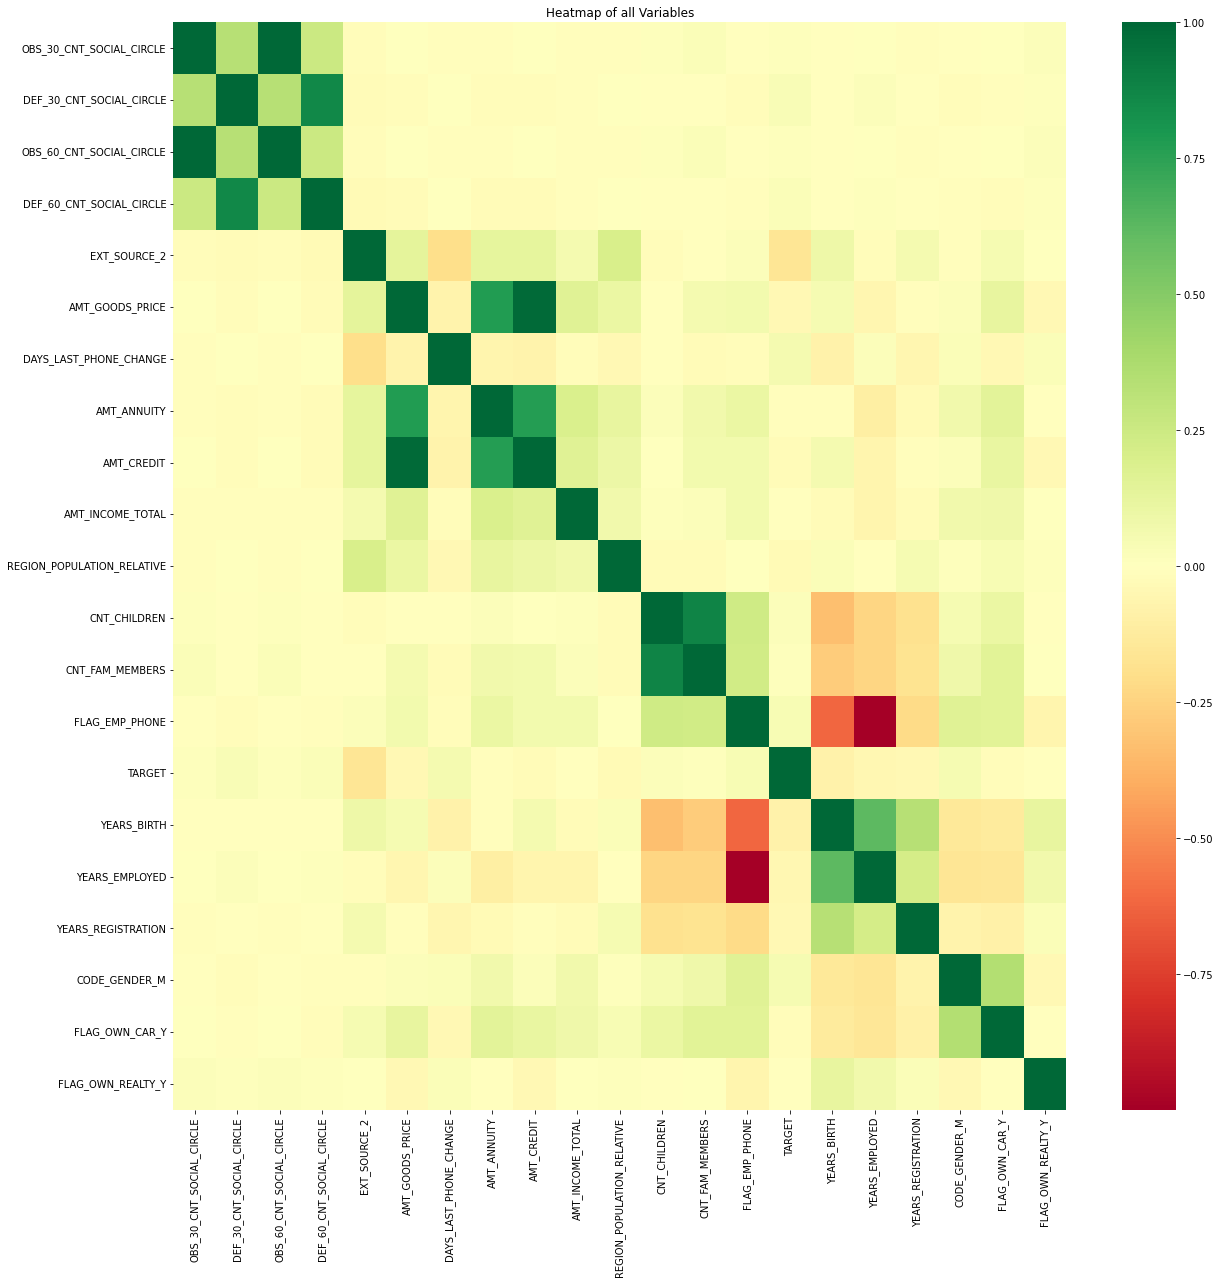

In [33]:
showHeatmap(data2)

#### Selecting Numeric Types from Training Data Frame

In [34]:
acceptableNumericTypes = [float, int]

# Get numeric data frame. Should already be numeric after cleaning
data2Numeric = data2.select_dtypes(include = ['float', 'int', 'uint8'])
# Verify we are working exclusively with numeric types
for i in data2Numeric:
    try:
        assert(data2Numeric[i].dtype in acceptableNumericTypes or data2Numeric[i].dtype == 'uint8')
    except:
        if debug == True:
            print("Error: non-numeric type in numeric data frame for column:",i)

if debug == True:
    print("Extracting numeric types from training data complete")

Extracting numeric types from training data complete


#### Verifying No Other Types exist

In [35]:
assert(len(data2.drop(data2Numeric.columns, axis = 1).columns) == 0)

if debug == True:
    print("No non-numeric columns exist in the training data frame")

No non-numeric columns exist in the training data frame


### Creating GBT
Here we use xgboost, which is responsible for about 80% of the top kaggle submissions, as our GBT model.

In [36]:
import xgboost as xgb

feature = data2.drop([targetColumnName], axis = 1).to_numpy()
#print(trainingData)
#print()
label = data2[targetColumnName].to_numpy()
#print(label)
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.33, random_state=42)

dtrain = xgb.DMatrix(data = X_train, label = y_train)
dtest = xgb.DMatrix(data = X_test, label = y_test)
# put our testing & training data into two seperates Dmatrixs objects
#dtrain2 = xgb.DMatrix(data =dtrain_matrix, label= train_labels)
#dtest2 = xgb.DMatrix(data = dtest_matrix, label= test_labels)

if debug == True:
    print("Successfully created xgboost GBT")

Successfully created xgboost GBT


In [37]:
# Create parameters
param = {'max_depth':4, 'eta':1, 'objective':'binary:logistic'}
# Train Model
model = xgb.train(param, dtrain, 2)

if debug == True:
    print("Model successfully boosted")

Model successfully boosted


#### Showing Baseline Prediction Error

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score
import statistics

# Make Prediction
preds = model.predict(dtest)

if debug == True:
    print("Predictions: ")
    print(lineString)
    print(preds)
    print()

Predictions: 
---------------------------------------------------------------------------------------------------------
[0.10657143 0.11989798 0.10657143 ... 0.07793677 0.19636573 0.05676287]



### Reading Previous Application Data

In [ ]:
# Read the data, assigning independant and dependant variables
dataPrev, a, b, = readData('dataset/previous_application.csv', targetColumnName, debug)

# Break if our data frame doesn't contain anything of value
assert(len(dataPrev.columns) > 0)

#### Basic Differences between Previous Application Data
The below snippet should describe the shape of the data frame, and variable discrepancies between this and the cleaned-out dataset.

In [19]:
newCols = []
emptyCols = []

if debug == True:
    print("Data Bureau has", dataPrev.shape[1],"columns and", dataPrev.shape[0],"rows")
    print(lineString)

# Determine Different variables
for i in dataPrev.columns:
    if i not in data2.columns:
        newCols.append(i)
for i in data2.columns:
    if i not in dataPrev.columns:
        emptyCols.append(i)

# Show differing columns here
if debug == True:
    # Show the new columns from the previous application
    print("New columns in data bureau data frame: ")
    for i in newCols: 
        print(i)
    print(lineString)
    # Show the columns that it doesn't have
    print("Columns data bureau does not have: ")
    for i in emptyCols:
        print(i)
    print(lineString)

Data Bureau has 37 columns and 1670214 rows
---------------------------------------------------------------------------------------------------------
New columns in data bureau data frame: 
SK_ID_PREV
SK_ID_CURR
NAME_CONTRACT_TYPE
AMT_APPLICATION
AMT_DOWN_PAYMENT
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
FLAG_LAST_APPL_PER_CONTRACT
NFLAG_LAST_APPL_IN_DAY
RATE_DOWN_PAYMENT
RATE_INTEREST_PRIMARY
RATE_INTEREST_PRIVILEGED
NAME_CASH_LOAN_PURPOSE
NAME_CONTRACT_STATUS
DAYS_DECISION
NAME_PAYMENT_TYPE
CODE_REJECT_REASON
NAME_TYPE_SUITE
NAME_CLIENT_TYPE
NAME_GOODS_CATEGORY
NAME_PORTFOLIO
NAME_PRODUCT_TYPE
CHANNEL_TYPE
SELLERPLACE_AREA
NAME_SELLER_INDUSTRY
CNT_PAYMENT
NAME_YIELD_GROUP
PRODUCT_COMBINATION
DAYS_FIRST_DRAWING
DAYS_FIRST_DUE
DAYS_LAST_DUE_1ST_VERSION
DAYS_LAST_DUE
DAYS_TERMINATION
NFLAG_INSURED_ON_APPROVAL
---------------------------------------------------------------------------------------------------------
Columns data bureau does not have: 
OBS_30_CNT_SOCIAL_CIRCLE
DEF_

#### Showing Categorical Columns in Previous Application Data
We see from plotting the categorical (or at least string type columns) in the previous application data frame that there is some cleaning to be done (such as removing XNA values largely)

In [20]:
# Plot categorical previous application columns
if savePlots == True:
    for i in dataPrev.select_dtypes('object').columns:
        plot_column(dataPrev, i, 'bar')

#### Showing Heatmap of Previous Application Data
The heatmap shows that there are some more prominent correlations of interest here. 

AMT_ANNUITY, APPLICATOIN, CREDIT, PAYMENT, and GOODS_PRICE are highly correlated and will most likely be tossed into a feature.

The RATE_INTEREST_PRIVILEGED, and DAYS_DECISION have some interesting correlation

The DAYS_<> variables also have some clear correlation which should be aggregated.

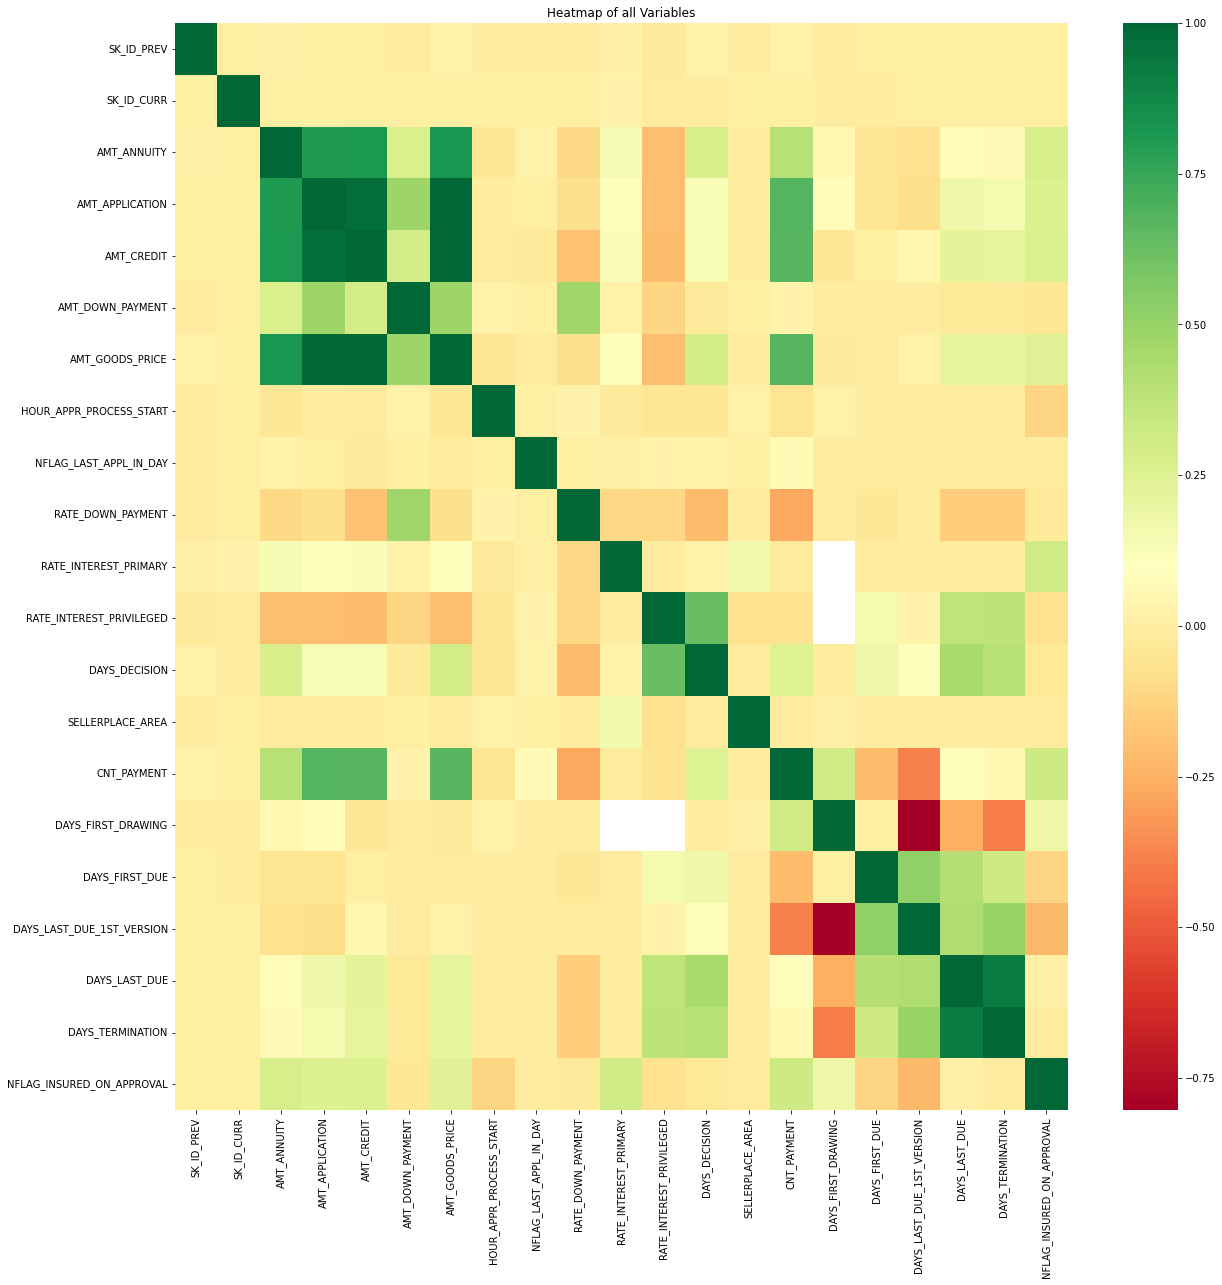

In [21]:
showHeatmap(dataPrev)

### Cleaning Previous Application Data

#### Setting Days to Years Map
As with our training dataframe we want to set a map of keys that are variable names of days variables in the previous application data frame to values that are the names of new years variables

In [22]:
prevDaysMapping = {
    'DAYS_FIRST_DUE': 'YEARS_FIRST_DUE',
    'DAYS_LAST_DUE': 'YEARS_LAST_DUE',
    'DAYS_LAST_DUE_1ST_VERSION': 'YEARS_LAST_DUE_1ST_VERSION',
    'DAYS_TERMINATION': 'YEARS_TERMINATION',
    'DAYS_FIRST_DRAWING': 'YEARS_FIRST_DRAWING'
}

#### Calling Clean Data

In [23]:
# Clean the data
dataPrev2 = cleanData(dataPrev,
                  [],
                  [],
                  prevDaysMapping)

Meaningless variables already removed...skipping step
cleanData: 0 variables successfully dropped
cleanData: successfully verified no duplicate values present
splitTypes: types successfully split. Returning...
cleanData: successfullly split categorical and continuous columns
346 entries deleted for NAME_CONTRACT_TYPE
693526 entries deleted for NAME_CASH_LOAN_PURPOSE
627384 entries deleted for NAME_PAYMENT_TYPE
5244 entries deleted for CODE_REJECT_REASON
1941 entries deleted for NAME_CLIENT_TYPE
953363 entries deleted for NAME_GOODS_CATEGORY
372230 entries deleted for NAME_PORTFOLIO
1063666 entries deleted for NAME_PRODUCT_TYPE
855720 entries deleted for NAME_SELLER_INDUSTRY
517215 entries deleted for NAME_YIELD_GROUP
cleanData: successfully set bad categorical entries to NaN
cleanData: successfully set null categorical entries to mode
getCategoricalDummies: encoding categorical variables
cleanData: successfully encoded categorical variables
cleanData: successfully set days


#### Analyzing Cleaned Previous Data

In [24]:
if debug == True:
    # Describe each of the columns in the clean data frame
    for i in dataPrev2.columns:
        print(dataPrev2[i].describe())
        print(lineString)
    # Describe number of variables as well
    print("Data Frame now has",dataPrev2.shape[1],"variables when previously had: ", dataPrev.shape[1])

count    1.670214e+06
mean     1.923089e+06
std      5.325980e+05
min      1.000001e+06
25%      1.461857e+06
50%      1.923110e+06
75%      2.384280e+06
max      2.845382e+06
Name: SK_ID_PREV, dtype: float64
---------------------------------------------------------------------------------------------------------
count    1.670214e+06
mean     2.783572e+05
std      1.028148e+05
min      1.000010e+05
25%      1.893290e+05
50%      2.787145e+05
75%      3.675140e+05
max      4.562550e+05
Name: SK_ID_CURR, dtype: float64
---------------------------------------------------------------------------------------------------------
count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64
---------------------------------------------------------------------------------------------------------
count    1.670214e+06
mean     1.752339e+05
std      2

count    1.670214e+06
mean     1.446521e-03
std      3.800565e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: NAME_CASH_LOAN_PURPOSE_Everyday expenses, dtype: float64
---------------------------------------------------------------------------------------------------------
count    1.670214e+06
mean     4.484455e-04
std      2.117179e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: NAME_CASH_LOAN_PURPOSE_Furniture, dtype: float64
---------------------------------------------------------------------------------------------------------
count    1.670214e+06
mean     1.796177e-04
std      1.340095e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: NAME_CASH_LOAN_PURPOSE_Gasification / water supply, dtype: float64
---------------------------------------------------------------------

count    1.670214e+06
mean     4.015593e-02
std      1.963249e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: NAME_TYPE_SUITE_Spouse, partner, dtype: float64
---------------------------------------------------------------------------------------------------------
count    1.670214e+06
mean     7.959309e-01
std      4.030198e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: NAME_TYPE_SUITE_Unaccompanied, dtype: float64
---------------------------------------------------------------------------------------------------------
count    1.670214e+06
mean     8.121654e-02
std      2.731675e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: NAME_CLIENT_TYPE_Refreshed, dtype: float64
---------------------------------------------------------------------------------------------------------

count    1.670214e+06
mean     2.544584e-04
std      1.594973e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: NAME_PORTFOLIO_Cars, dtype: float64
---------------------------------------------------------------------------------------------------------
count    1.670214e+06
mean     2.763496e-01
std      4.471919e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: NAME_PORTFOLIO_Cash, dtype: float64
---------------------------------------------------------------------------------------------------------
count    1.670214e+06
mean     6.365897e-01
std      4.809817e-01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: NAME_PORTFOLIO_POS, dtype: float64
---------------------------------------------------------------------------------------------------------
count    1.670214e+06
mean   

count    1.670214e+06
mean     2.025728e-02
std      1.408792e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: PRODUCT_COMBINATION_Cash Street: low, dtype: float64
---------------------------------------------------------------------------------------------------------
count    1.670214e+06
mean     2.075063e-02
std      1.425484e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: PRODUCT_COMBINATION_Cash Street: middle, dtype: float64
---------------------------------------------------------------------------------------------------------
count    1.670214e+06
mean     3.550503e-02
std      1.850525e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: PRODUCT_COMBINATION_Cash X-Sell: high, dtype: float64
-------------------------------------------------------------------------------

In [25]:
#showHeatmap(dataPrev2)

In [26]:
trainingData = data2.drop([targetColumnName], axis = 1).to_numpy()
label = data2[targetColumnName].to_numpy()

#for i in trainingData.columns:
    #print(trainingData[i].dtype)

#dtrain = xgb.DMatrix(data, label=label)

## Bayesian Inference

In [ ]:
# example of fitting a final model and making a prediction on the sonar dataset
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

#continuous.fillna(continuous.mean())
#dat2 = data2.fillna(data2.mean())

# Create feature and label array
feature = data2.drop([targetColumnName], axis = 1).fillna(data2.mean()).to_numpy()
label = data2[targetColumnName].to_numpy()

# Split test data
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.33, random_state=42)

exported_pipeline = make_pipeline(
    StackingEstimator(estimator=GaussianNB()),
    GradientBoostingClassifier(learning_rate=0.1, 
                               max_depth=7,
                               max_features=0.7000000000000001,
                               min_samples_leaf=15,
                               min_samples_split=10,
                               n_estimators=100,
                               subsample=0.9000000000000001)
)

# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 1)
# fit the model
exported_pipeline.fit(X_train, y_train)
yhat = exported_pipeline.predict(y_test)
print('Predicted: %.3f' % yhat[0])

/home/feeks/.local/lib/python3.8/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


#### Calculating Likelihoods

In [ ]:
# Helper function that creates a likelihood data frame given a column, prior, and data frame
def calcLikelihood(col, prior, df):
    # Only try to do anything if column is in the data frame
    if col not in df.columns: return None
    # Else group as a ratio of distribution compared to the relative target weight
    likelihood = df.groupby([targetColumnName, col]).size().div(len(df)).div(prior)
    return likelihood

# Map of likelihoods
likelihoods = {}

# Calculate likelihood for all columns and display it if desired
for i in dataPrev2.columns[:]:
    l = calcLikelihood(i, prior ,dataPrev2)
    likelihoods[i] = l
    if debug == True:    
        print(l)
        print(lineString)

#### Encoding Data

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoded_data = dataPrev.apply(LabelEncoder().fit_transform)

if debug == True:
    print("Completed label encoding for bureau data")

### Create Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

# Instantiate Gaussian Naive Bayes
algorithm = GaussianNB(priors=None, var_smoothing=1e-9)

# Split data frame into X and y
features = removeColumn(targetColumnName, encoded_data)
target = encoded_data[targetColumnName]

# Normalize our features for the model
#sc = StandardScaler()
#features = sc.fit_transform(features)

# Fit the algorithm
algorithm.fit(features, target)

if debug == True:
    print("Gaussian NB successfully fitted on bureau data for target classes of",algorithm.classes_)

In [ ]:
print(y_test)
print(predict)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

# Make predictions with Naive Bayesian model on training data
predict = algorithm.predict_proba(observations).round()

cm = confusion_matrix(y_test, predict)
ac = accuracy_score(y_test,predict)

if debug == True:
    print(cm)
    print(lineString)
    print(ac)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
import numpy as np
clf = MultinomialNB()
clf.fit(encoded_data.drop([targetColumnName], axis=1), encoded_data[targetColumnName])

# {"Age":'<=30', "Income":"medium", "Student":'yes' , "Credit_Rating":'fair'}
# The data is encoded as [1,2,1,1]

#X = np.array([1,2,1,1])8
#print (clf._joint_log_likelihood(X.reshape(1,-1)))
#print ("Prediction of : ", clf.predict(X.reshape(1,-1)))